In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [38]:
df= pd.read_csv(r'https://raw.githubusercontent.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/master/perrin-freres-monthly-champagne-.csv')

In [39]:
df.drop([106,105],axis=0,inplace=True)
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [90]:
df

,Sales,forecast
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-05-01,4618.0,4521.053292
1972-06-01,5312.0,5328.280765
1972-07-01,4298.0,5303.577441


In [40]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

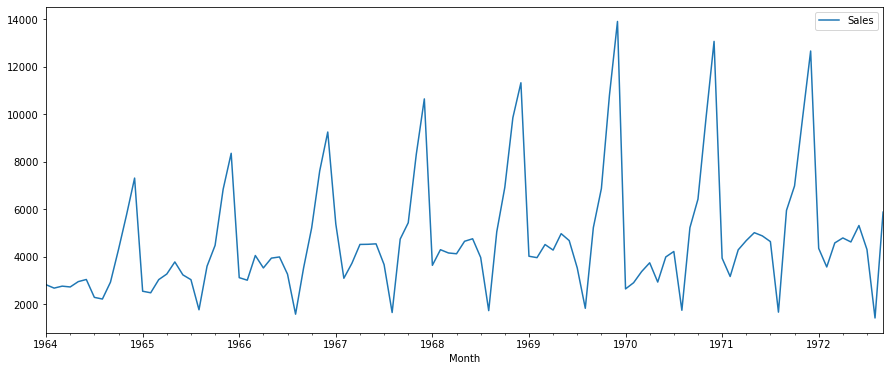

In [26]:

df.plot(figsize=(15,6))


We can Observe Seasonality in the Sales

In [11]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])
test_result

(-1.8335930563276248,
 0.363915771660244,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [ ]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [41]:
df_train=df[:85]
df_test = df[85:]

In [42]:
df_train

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1970-09-01,5221.0
1970-10-01,6424.0
1970-11-01,9842.0


In [27]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [43]:
model=ARIMA(df_train['Sales'],order=(1,1,1))
model_fit=model.fit()

<AxesSubplot:xlabel='Month'>

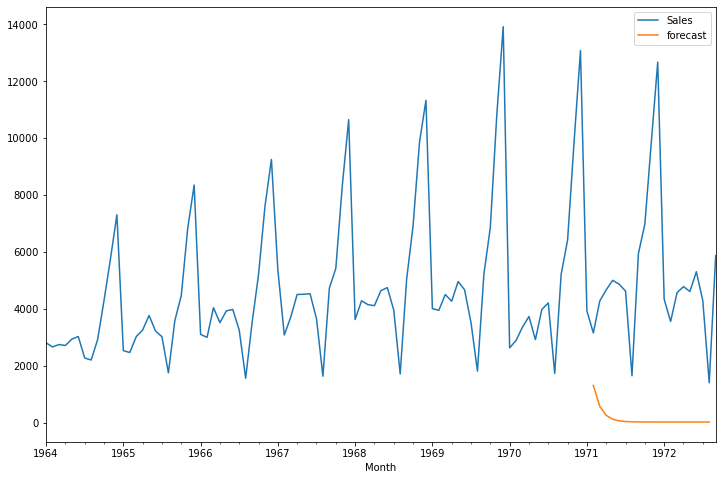

In [45]:
df['forecast']=model_fit.predict(start=85,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [32]:
import statsmodels.api as sm

In [88]:
model=sm.tsa.statespace.SARIMAX(df_train['Sales'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()

<AxesSubplot:xlabel='Month'>

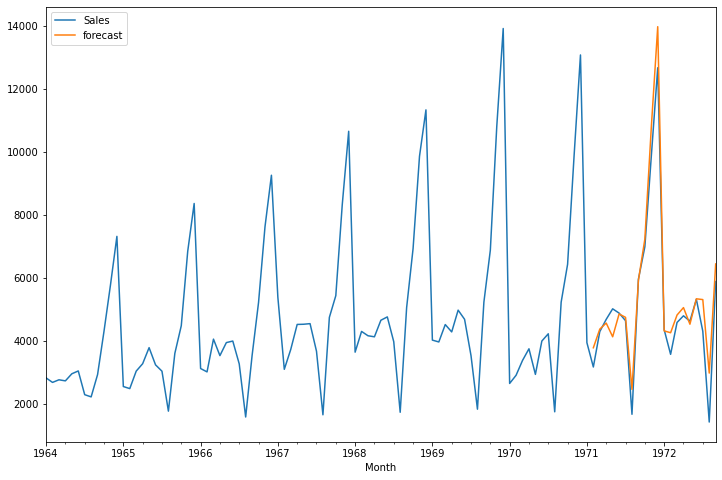

In [89]:
df['forecast']=results.predict(start=85,end=104,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [68]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Sales,forecast
1974-04-01,NaN,NaN
1974-05-01,NaN,NaN
1974-06-01,NaN,NaN
1974-07-01,NaN,NaN
1974-08-01,NaN,NaN


In [69]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

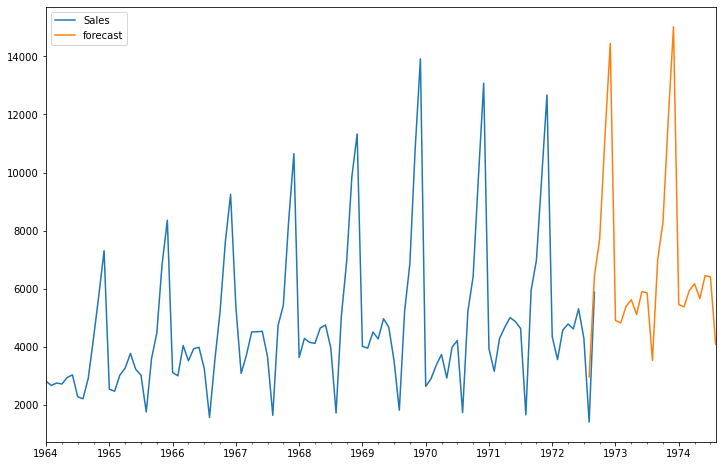

In [73]:
future_df['forecast'] = results.predict(start = 103, end = 128, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [82]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   85
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -593.013
Date:                            Fri, 18 Feb 2022   AIC                           1192.025
Time:                                    18:37:15   BIC                           1198.855
Sample:                                01-01-1964   HQIC                          1194.744
                                     - 01-01-1971                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2951      0.094     -3.152      0.002      -0.479      -0.112
ar.S.L12      -0.2451      0.089     -2.767      0.006      -0.419      -0.071
sigma2      8.735e+05   1.16e+05      7.516      0.000    6.46e+05     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.99   Jarque-Bera (JB):                33.01
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               2.41   Skew:                            -1.03
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
df[['Sales','forecast']].tail(20)

,Sales,forecast
Month,,
1971-02-01,3162.0,3772.382863
1971-03-01,4286.0,4364.822871
1971-04-01,4676.0,4556.859338
1971-05-01,5010.0,4121.606828
1971-06-01,4874.0,4847.075113
1971-07-01,4633.0,4739.336135
1971-08-01,1659.0,2450.576704
1971-09-01,5951.0,5913.542816
1971-10-01,6981.0,7226.096931


In [ ]:
df_merged.to_csv(r'C:\Users\A803377\OneDrive - Solenis LLC\Documents\\Trek.csv', index=False)

In [95]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import r2_score
#score variables
MAE = round(MAE(df['Sales'][85:], df['forecast'][85:]),2)
MSE = round(MSE(df['Sales'][85:], df['forecast'][85:]),2)
MAPE = round(MAPE(df['Sales'][85:], df['forecast'][85:]),2)

R_2 = round(r2_score(df['Sales'][85:], df['forecast'][85:]),4)


print(f" Mean Absolute Error: {MAE}\n")
print(f" Mean Squared Error: {MSE}\n")
print(f" Mean Absolute Percentage Error: {MAPE}\n")
print(f" R^2 Score: {R_2}\n")


 Mean Absolute Error: 479.16

 Mean Squared Error: 438816.21

 Mean Absolute Percentage Error: 0.15

 R^2 Score: 0.9264

